In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('nba.txt')

In [3]:
df.dropna(axis=1,inplace=True)

In [4]:
df.head()

,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3,PER
0,SG,55,36.7,35.2,10.2,23.0,44.3,4.6,12.7,36.3,...,11.8,86.3,6.4,7.3,1.7,0.9,4.4,18,3,29.45
1,SG,50,35.8,30.1,10.3,22.5,45.7,2.7,8.1,33.3,...,8.1,84.7,4.4,6.0,1.1,0.4,3.4,7,0,22.87
2,PG,54,35.5,30.1,9.3,20.9,44.3,3.5,9.5,36.9,...,9.3,85.9,4.4,9.2,1.1,0.1,4.8,24,2,24.56
3,PF,52,30.9,29.7,10.9,19.8,55.1,1.5,4.7,31.4,...,10.3,62.1,13.7,5.8,1.1,1.1,3.7,47,4,32.02
4,PG,54,37.0,29.5,9.4,20.4,46.0,3.9,10.0,39.3,...,7.7,88.9,4.4,7.9,1.0,0.3,2.9,16,1,26.79


In [5]:
df.POS.unique()

array(['SG', 'PG', 'PF', 'SF', 'C'], dtype=object)

In [6]:
import seaborn as sns

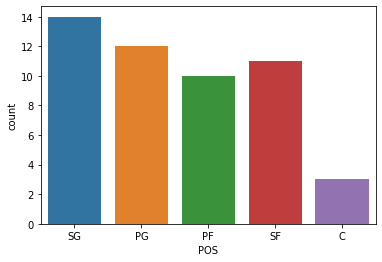

In [7]:
sns.countplot('POS',data=df)

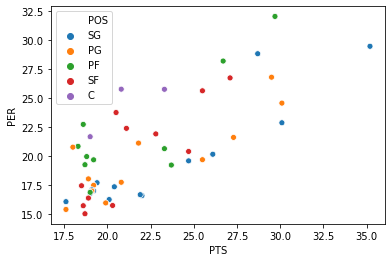

In [8]:
sns.scatterplot(x='PTS',y='PER',data=df,hue='POS')

In [9]:
X=df.drop('PER',axis=1)

In [10]:
X.shape

(50, 20)

In [98]:
y=df.iloc[:,-1]

In [12]:
y.shape

(50,)

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
X.POS=le.fit_transform(X.POS)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
X_train=scaler.fit_transform(X_train)

In [21]:
X_test=scaler.transform(X_test)

In [22]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [23]:
model=Sequential()

In [24]:
model.add(Dense(20,activation='relu',input_shape=(20,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))

In [25]:
model.compile(optimizer='adam',loss='mse')

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
Total params: 12,709
Trainable params: 12,709
Non-trainable params: 0
__________________________________________________

In [27]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32)

Train on 45 samples, validate on 5 samples
Epoch 1/200
45/45 [==============================] - 0s 3ms/step - loss: 439.6837 - val_loss: 419.0992
Epoch 2/200
45/45 [==============================] - 0s 111us/step - loss: 435.0005 - val_loss: 415.3485
Epoch 3/200
45/45 [==============================] - 0s 111us/step - loss: 430.6583 - val_loss: 411.2698
Epoch 4/200
45/45 [==============================] - 0s 89us/step - loss: 425.8411 - val_loss: 406.5125
Epoch 5/200
45/45 [==============================] - 0s 111us/step - loss: 420.3571 - val_loss: 400.8357
Epoch 6/200
45/45 [==============================] - 0s 89us/step - loss: 413.8478 - val_loss: 393.8436
Epoch 7/200
45/45 [==============================] - 0s 133us/step - loss: 405.6146 - val_loss: 385.3893
Epoch 8/200
45/45 [==============================] - 0s 111us/step - loss: 396.1580 - val_loss: 375.0837
Epoch 9/200
45/45 [==============================] - 0s 89us/step - loss: 385.0453 - val_loss: 362.4512
Epoch 10/200
45/4

Epoch 80/200
45/45 [==============================] - 0s 89us/step - loss: 3.1715 - val_loss: 9.7821
Epoch 81/200
45/45 [==============================] - 0s 89us/step - loss: 3.1085 - val_loss: 9.5597
Epoch 82/200
45/45 [==============================] - 0s 89us/step - loss: 3.0562 - val_loss: 9.3442
Epoch 83/200
45/45 [==============================] - 0s 133us/step - loss: 3.0103 - val_loss: 9.1647
Epoch 84/200
45/45 [==============================] - 0s 111us/step - loss: 2.9763 - val_loss: 8.9940
Epoch 85/200
45/45 [==============================] - 0s 111us/step - loss: 2.9576 - val_loss: 8.9285
Epoch 86/200
45/45 [==============================] - 0s 89us/step - loss: 2.9208 - val_loss: 9.0808
Epoch 87/200
45/45 [==============================] - 0s 133us/step - loss: 2.8451 - val_loss: 9.5094
Epoch 88/200
45/45 [==============================] - 0s 67us/step - loss: 2.7977 - val_loss: 9.8346
Epoch 89/200
45/45 [==============================] - 0s 111us/step - loss: 2.8210 - va

Epoch 160/200
45/45 [==============================] - 0s 111us/step - loss: 1.1289 - val_loss: 5.3431
Epoch 161/200
45/45 [==============================] - 0s 89us/step - loss: 1.1235 - val_loss: 5.4240
Epoch 162/200
45/45 [==============================] - 0s 89us/step - loss: 1.1273 - val_loss: 5.5519
Epoch 163/200
45/45 [==============================] - 0s 111us/step - loss: 1.0746 - val_loss: 5.4788
Epoch 164/200
45/45 [==============================] - 0s 89us/step - loss: 1.0710 - val_loss: 5.3848
Epoch 165/200
45/45 [==============================] - 0s 89us/step - loss: 1.0471 - val_loss: 5.4377
Epoch 166/200
45/45 [==============================] - 0s 89us/step - loss: 1.0372 - val_loss: 5.5013
Epoch 167/200
45/45 [==============================] - 0s 89us/step - loss: 1.0375 - val_loss: 5.5178
Epoch 168/200
45/45 [==============================] - 0s 89us/step - loss: 1.0225 - val_loss: 5.3745
Epoch 169/200
45/45 [==============================] - 0s 89us/step - loss: 1.00

In [28]:
losses=pd.DataFrame(model.history.history)

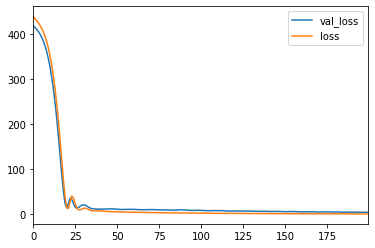

In [29]:
losses.plot()

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [31]:
import numpy as np

In [32]:
y_pred=model.predict(X_test)

In [33]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.0681145522379274

In [34]:
mean_absolute_error(y_test,y_pred)

1.6089125366210937

In [35]:
df['PER'].describe()

count    50.000000
mean     20.448200
std       4.216199
min      15.040000
25%      16.995000
50%      19.685000
75%      22.645000
max      32.020000
Name: PER, dtype: float64

In [36]:
20.448200

20.4482

In [37]:
 explained_variance_score(y_test,y_pred)

0.7817353769040132

In [38]:
import matplotlib.pyplot as plt

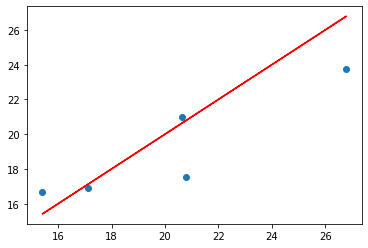

In [39]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

In [42]:
import random

random.seed()
random_ind=random.randint(0,len(df))

new_player=df.drop('PER',axis=1).iloc[random_ind]

In [45]:
le.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype=object)

In [44]:
new_player

POS      SG
GP       48
MIN    35.8
PTS    17.6
FGM       6
FGA    14.6
FG%    40.9
3PM     2.7
3PA       7
3P%    38.8
FTM     2.9
FTA     3.5
FT%    84.3
REB     3.8
AST     6.6
STL     1.9
BLK     0.3
TO      2.3
DD2       6
TD3       0
Name: 49, dtype: object

In [46]:
new_player[0]=4

In [47]:
new_player=scaler.transform(new_player.values.reshape(-1,20))

In [48]:
model.predict(new_player)

array([[16.317257]], dtype=float32)

In [49]:
df.iloc[random_ind]['PER']

16.08

#  train on full data set

In [88]:
scaler_full=scaler.fit_transform(X)

In [89]:
len(scaler_full)

50

In [102]:
model=Sequential()

In [103]:
model.add(Dense(20,activation='relu',input_shape=(20,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1))

In [104]:
model.compile(optimizer='adam',loss='mse')

In [105]:
model.fit(scaler_full,y,epochs=200,batch_size=32)

Epoch 1/200
50/50 [==============================] - 0s 2ms/step - loss: 435.7143
Epoch 2/200
50/50 [==============================] - 0s 60us/step - loss: 432.2553
Epoch 3/200
50/50 [==============================] - 0s 60us/step - loss: 428.9519
Epoch 4/200
50/50 [==============================] - 0s 60us/step - loss: 425.0887
Epoch 5/200
50/50 [==============================] - 0s 80us/step - loss: 420.2952
Epoch 6/200
50/50 [==============================] - 0s 80us/step - loss: 414.7111
Epoch 7/200
50/50 [==============================] - 0s 160us/step - loss: 407.4772
Epoch 8/200
50/50 [==============================] - 0s 80us/step - loss: 399.1453
Epoch 9/200
50/50 [==============================] - 0s 180us/step - loss: 388.1492
Epoch 10/200
50/50 [==============================] - 0s 80us/step - loss: 375.3794
Epoch 11/200
50/50 [==============================] - 0s 100us/step - loss: 359.1081
Epoch 12/200
50/50 [==============================] - 0s 100us/step - loss: 339.102

50/50 [==============================] - 0s 80us/step - loss: 2.9436
Epoch 101/200
50/50 [==============================] - 0s 100us/step - loss: 2.8938
Epoch 102/200
50/50 [==============================] - 0s 100us/step - loss: 2.8295
Epoch 103/200
50/50 [==============================] - 0s 60us/step - loss: 2.7868
Epoch 104/200
50/50 [==============================] - 0s 60us/step - loss: 2.7316
Epoch 105/200
50/50 [==============================] - 0s 80us/step - loss: 2.6729
Epoch 106/200
50/50 [==============================] - 0s 80us/step - loss: 2.6436
Epoch 107/200
50/50 [==============================] - 0s 100us/step - loss: 2.5756
Epoch 108/200
50/50 [==============================] - 0s 60us/step - loss: 2.5213
Epoch 109/200
50/50 [==============================] - 0s 80us/step - loss: 2.4858
Epoch 110/200
50/50 [==============================] - 0s 60us/step - loss: 2.4377
Epoch 111/200
50/50 [==============================] - 0s 60us/step - loss: 2.3887
Epoch 112/200
5

50/50 [==============================] - 0s 80us/step - loss: 0.6825
Epoch 199/200
50/50 [==============================] - 0s 60us/step - loss: 0.6466
Epoch 200/200
50/50 [==============================] - 0s 60us/step - loss: 0.6458


In [106]:
losses=pd.DataFrame(model.history.history)

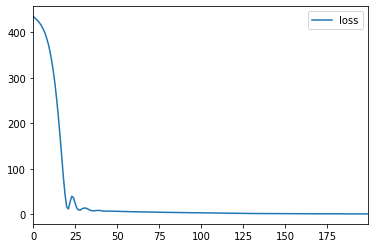

In [107]:
losses.plot()

In [109]:
y_pred=model.predict(scaler_full)

In [110]:
import matplotlib.pyplot as plt

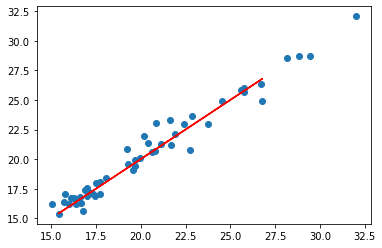

In [111]:
plt.scatter(y,y_pred)
plt.plot(y_test,y_test,'r')

In [112]:
model.save('nba.h5')

In [113]:
import joblib

In [144]:
joblib.dump(scaler,'nba.pickle')

['nba.pickle']

In [132]:
le.classes_

array(['C', 'PF', 'PG', 'SF', 'SG'], dtype=object)

In [136]:
X.head()

,POS,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,STL,BLK,TO,DD2,TD3
0,4,55,36.7,35.2,10.2,23.0,44.3,4.6,12.7,36.3,10.2,11.8,86.3,6.4,7.3,1.7,0.9,4.4,18,3
1,4,50,35.8,30.1,10.3,22.5,45.7,2.7,8.1,33.3,6.9,8.1,84.7,4.4,6.0,1.1,0.4,3.4,7,0
2,2,54,35.5,30.1,9.3,20.9,44.3,3.5,9.5,36.9,8.0,9.3,85.9,4.4,9.2,1.1,0.1,4.8,24,2
3,1,52,30.9,29.7,10.9,19.8,55.1,1.5,4.7,31.4,6.4,10.3,62.1,13.7,5.8,1.1,1.1,3.7,47,4
4,2,54,37.0,29.5,9.4,20.4,46.0,3.9,10.0,39.3,6.8,7.7,88.9,4.4,7.9,1.0,0.3,2.9,16,1


In [126]:
y.head()

0    29.45
1    22.87
2    24.56
3    32.02
4    26.79
Name: PER, dtype: float64

In [137]:
player_sample={
    "POS":4,
    "GP":55,
    "MIN":36.7,
    "PTS":35.2,
    "FGM":10.2,
    "FGA":23.0,
    "FG%":44.3,
    "3PM":4.6,
    "3PA":12.7,
    "3P%":36.3,
    "FTM":10.2,
    "FTA":11.8,
    "FT%":86.3,
    "REB":6.4,
    "AST":7.3,
    "STL":1.7,
    "BLK":0.9,
    "TO":4.4,
    "DD2":18,
    "TD3":3
}

In [138]:
from keras.models import load_model

In [203]:
from keras.models import load_model
import numpy as np

load_model=load_model('nba.h5')
scaler_model=joblib.load('nab.pickle')


def return_predictions(model,scaler,sample_json):
    POS= sample_json["POS"]
    GP= sample_json["GP"]
    MIN= sample_json["MIN"]
    PTS= sample_json["PTS"]
    FGM= sample_json["FGM"]
    FGA= sample_json["FGA"]
    FG= sample_json["FG%"]
    PM= sample_json["3PM"]
    PA= sample_json["3PA"]
    P= sample_json["3P%"]
    FTM= sample_json["FTM"]
    FTA= sample_json["FTA"]
    FT= sample_json["FT%"]
    FTM= sample_json["FTM"]
    FTA= sample_json["FTA"]
    FT= sample_json["FT%"]
    REB= sample_json["REB"]
    AST= sample_json["AST"]
    STL= sample_json["STL"]
    BLK= sample_json["BLK"]
    TO= sample_json["TO"]
    DD2= sample_json["DD2"]
    TD3= sample_json["TD3"]
    
    value = max(y.values)
    
    
    player=[[POS, GP, MIN, PTS, FGM, FGA, FG, PM, PA, P, FTM, FTA, FT, REB, AST, STL, BLK, TO, DD2, TD3]]
    
    player=scaler.transform(player)
    
    prediction=model.predict(player)
    print("player",value)

    return prediction[0][0]

In [204]:
return_predictions(load_model,scaler_model,player_sample)

player 32.02


28.705498

In [186]:
y

0     29.45
1     22.87
2     24.56
3     32.02
4     26.79
5     28.81
6     21.61
7     26.73
8     28.18
9     20.16
10    19.69
11    25.62
12    20.40
13    19.59
14    19.23
15    20.64
16    25.75
17    21.91
18    16.60
19    16.68
20    21.12
21    22.39
22    25.76
23    17.75
24    23.75
25    17.36
26    15.75
27    16.26
28    15.97
29    17.71
30    17.49
31    17.01
32    19.68
33    17.10
34    16.99
35    16.78
36    21.67
37    16.88
38    16.39
39    18.04
40    19.96
41    19.26
42    15.04
43    22.73
44    15.73
45    17.45
46    20.84
47    20.77
48    15.41
49    16.08
Name: PER, dtype: float64